In [1]:
# Start by importing pylab for graphing and math for various math functions
import pylab
import math

# Make a separate function for graphing, imports x and y values (first determined by XRD_Analysis)
def graph(x,y):
        
    # Simply plots and labels the graph
    pylab.title('Intensity vs 2θ')
    pylab.xlabel('2θ (deg.)')
    pylab.ylabel('Intensity (a.u.)')
    pylab.plot(x,y)
    pylab.show()
    
    return

# This function calculates the closest two leftmost data points to any specified value, in this case, the half maximum value
def closest_datapoints(x,y,halfpeaks,peakscenter):
    
    # Initializing several lists for calculations of the actual data
    # These two lists are used  to find the closest values above and below the half maximum value
    listupper = []
    listlower = []
    
    # Runs a for loop to find the closest data points for each half peak
    for i in range(len(halfpeaks)):
        
        # Initializing values for calculations
        # These values are used to determine the closest two data points above and below the half maximum value for each peak
        uppery = 100
        upperx = 0
        lowery = 0
        lowerx = 0
    
        # A nested for loop that checks every value in the data set
        for j in range(len(y)):
            # If statements to determine the above and below values
            # The data points must be very close to the peaks (distance < 1) to be counted
            # This is to prevent any other data point with similar intensity being accidentally calculated
            if y[j] > lowery and y[j] < halfpeaks[i] and x[j] < peakscenter[i] and (peakscenter[i] - x[j]) < 1:
                lowery = y[j]
                lowerx = x[j]
            if y[j] < uppery and y[j] > halfpeaks[i] and x[j] < peakscenter[i] and (peakscenter[i] - x[j]) < 1:
                uppery = y[j]
                upperx = x[j]
                
        # Stores the calculated values into lists to be used later
        listlower.append(lowerx)
        listlower.append(lowery)
        listupper.append(upperx)
        listupper.append(uppery)
    
    # Finally returns the two closest data points in two lists with the x value first followed by the y value, a list for the lower point and a list for the higher point
    return listlower, listupper

# This function calculates the average size given several values for full width at half maximum
# This function assumes the given full width half maximum value is in degrees
def calculate_average_size(wavelength, fwhm):
    
    # Initializes the variable to store the calculated average size
    size_average = 0
    
    # Runs a for loop that adds the calculation for the nanoparticle size to the average list using the given equation
    for i in range(len(fwhm)):
        # First converts the angle into radians
        fwhm[i] = fwhm[i]*(math.pi/180)
        # Adds each calculated nanoparticle size to the total average
        size_average += (0.9*wavelength)/(fwhm[i]*math.cos(fwhm[i]/2))
        
    # Divides by the total number of nanoparticle sizes to calculate the average size
    size_average = size_average/len(fwhm)
    
    # Returns the average size    
    return size_average

# Main function
def XRD_Analysis(file):
    
    # First opens and reads the file, storing it in a variable
    infile = open(file, 'r')
    data = infile.read()
    infile.close()
    data = data.split()
    # After closing the file, Splits the information so it is easier to read
    
    # Initializing variables (x is the x-axis on the graph, or 2𝜃 values, and y is the y-axis, or intensity values)
    x = []
    y = []
    # peaks represents the peak intensity values 
    peaks = []
    # peakscenter represents the x-values at each peak
    peakscenter = []
    # halfpeaks represents half the intensity of each peak
    halfpeaks = []
    
    # i is used as a counter for a while-loop
    i = 0
    while i != len(data):
        # This loop orders the data from the file into x and y values accordingly
        # It also remembers which values are peaks (have asterisks) and then removes the asterisks and converts it in floats to be used in calculations
        x.append(float(data[i]))
        if '*' in data[i+1]:
            y.append(float(data[i+1].replace('*', '')))
            peaks.append(float(data[i+1].replace('*', '')))
            halfpeaks.append(float(data[i+1].replace('*', ''))/2)
            peakscenter.append(float(data[i]))
        else:
            y.append(float(data[i+1]))
        i += 2
    
    # Now that the x and y values are sorted, run the graphing function with the x and y lists to create the graph
    graph(x,y)
    
    # Run the function to calculate the closest data points
    listlower, listupper = closest_datapoints(x,y,halfpeaks,peakscenter)
    
    # approximatex is used to store the approximate x value for each half maximum value on the left side of the graph
    # Only calculates leftmost points for simplicity and ease, then multiplies the value by 2 to find the full width half maximum
    approximatex = []
    # fwhm is the distance between the peakscenter and the approximatex value, initially in degrees
    fwhm = []
    wavelength = 0.07107
        
    # Initializes two variables, simply used to break the equation up to make it easier to calculate
    # The equation is the equation for linear interpolation rearranged to solve for an unknown x with two known coordinates and a known y value
    equationupper = 0
    equationlower = 0
        
    # Uses linear interpolation to find the approximate x value for each half peak
    for i in range(len(halfpeaks)):
        equationupper = (halfpeaks[i] - listlower[2*i+1])*(listupper[2*i]-listlower[2*i])
        equationlower = (listupper[2*i+1] - listlower[2*i+1])
        # Stores the approximate x value in the list
        approximatex.append((equationupper/equationlower) + listlower[2*i])
        # Calculates the distance between the peak center and the leftmost approximate x value, then multiplies by two for the full width half maximum value
        fwhm.append((peakscenter[i] - approximatex[i])*2)
    
    # Run the function to calculate the average size using the calculated values
    average = calculate_average_size(wavelength, fwhm)
    
    return average

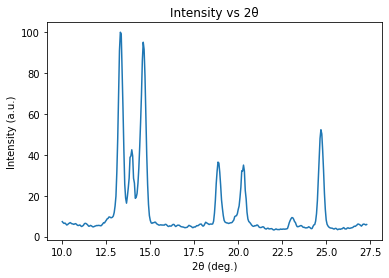

11.360398964438707

In [3]:
XRD_Analysis('XRD_example2.txt')